In [2]:
!pip install pandas scipy seaborn matplotlib openpyxl

In [3]:
# ============================
# 1. Imports e setup
# ============================
import pandas as pd
import glob
import os
import re
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

# Garantir que as figuras apareçam no notebook
%matplotlib inline

In [4]:
# === 1. Função para normalizar nomes de cenários ===
'''def normalize_scenario(fname: str) -> str:
    base = os.path.basename(fname)
    base = re.sub(r"\.(csv|txt)$", "", base, flags=re.IGNORECASE)
    base = re.sub(r"^irace[_-]?", "", base, flags=re.IGNORECASE)
    base = re.sub(r"[_-]?instances$", "", base, flags=re.IGNORECASE)
    base = re.sub(r"E\d+", "", base)  # remove E1, E2, etc.
    return base.strip("_-")'''


def normalize_scenario(filename):
    """
    Extrai corretamente o nome completo do cenário no formato KxEyCzJw
    Exemplo:
      irace_K7E7C18J3_instances.csv  →  K7E7C18J3
    """
    base = os.path.basename(filename)
    match = re.search(r"irace_(K\d+E\d+C\d+J\d+)_instances\.csv", base)
    if match:
        return match.group(1)
    else:
        # fallback – retorna tudo entre 'irace_' e '_instances'
        return base.replace("irace_", "").replace("_instances.csv", "")

In [5]:
# === 2. Varre todos os arquivos de instâncias ===
#files = glob.glob("*_instances.csv") + glob.glob("*instances.txt")
#print(f"Arquivos de instâncias encontrados: {len(files)}")

files = glob.glob("*_instances.csv")
print(f"Arquivos de instâncias encontrados: {len(files)}")


Arquivos de instâncias encontrados: 135


In [6]:
# === 3. Lê todos e monta dataframe unificado ===
records = []
for file in files:
    scenario = normalize_scenario(file)
    try:
        df_inst = pd.read_csv(file, header=None)
        inst_list = df_inst.iloc[:,0].dropna().astype(str).tolist()
    except Exception:
        # fallback para leitura manual
        with open(file, "r", encoding="utf-8", errors="ignore") as f:
            inst_list = [line.strip().strip('"').strip("'") for line in f if line.strip()]
    for inst in inst_list:
        records.append((scenario, inst, os.path.basename(inst)))

df_instances = pd.DataFrame(records, columns=["Scenario","Instance","Instance_Basename"])
print("Total de linhas lidas:", len(df_instances))
df_instances.head()


Total de linhas lidas: 2070


,Scenario,Instance,Instance_Basename
0,K7E6C15J1,x,x
1,K7E6C15J1,/home/administrador/giron/labotim/HGS-CVRP/Ins...,Golden_18.vrp
2,K7E6C15J1,/home/administrador/giron/labotim/HGS-CVRP/Ins...,Golden_3.vrp
3,K7E6C15J1,/home/administrador/giron/labotim/HGS-CVRP/Ins...,X-n190-k8.vrp
4,K7E6C15J1,/home/administrador/giron/labotim/HGS-CVRP/Ins...,X-n219-k73.vrp


In [7]:
df_instances

,Scenario,Instance,Instance_Basename
0,K7E6C15J1,x,x
1,K7E6C15J1,/home/administrador/giron/labotim/HGS-CVRP/Ins...,Golden_18.vrp
2,K7E6C15J1,/home/administrador/giron/labotim/HGS-CVRP/Ins...,Golden_3.vrp
3,K7E6C15J1,/home/administrador/giron/labotim/HGS-CVRP/Ins...,X-n190-k8.vrp
4,K7E6C15J1,/home/administrador/giron/labotim/HGS-CVRP/Ins...,X-n219-k73.vrp
...,...,...,...
2065,K3E2C15J1,/home/administrador/giron/labotim/HGS-CVRP/Ins...,X-n524-k153.vrp
2066,K3E2C15J1,/home/administrador/giron/labotim/HGS-CVRP/Ins...,X-n837-k142.vrp
2067,K3E2C15J1,/home/administrador/giron/labotim/HGS-CVRP/Ins...,X-n298-k31.vrp
2068,K3E2C15J1,/home/administrador/giron/labotim/HGS-CVRP/Ins...,X-n176-k26.vrp


In [8]:
# Quantos cenários distintos
#print("Cenários distintos:", df_instances["Scenario"].nunique())
#TAVA ERRADO


In [9]:
import glob
files = glob.glob("*_instances.csv")
print("Arquivos encontrados:", len(files))
print(sorted(files)[:10])  # ver primeiros

#135 instancias

Arquivos encontrados: 135
['irace_K3E1C10J1_instances.csv', 'irace_K3E1C10J2_instances.csv', 'irace_K3E1C10J3_instances.csv', 'irace_K3E1C15J1_instances.csv', 'irace_K3E1C15J2_instances.csv', 'irace_K3E1C15J3_instances.csv', 'irace_K3E1C18J1_instances.csv', 'irace_K3E1C18J2_instances.csv', 'irace_K3E1C18J3_instances.csv', 'irace_K3E2C10J1_instances.csv']


In [10]:
# Quantas instâncias por cenário
#print("\nDistribuição de instâncias por cenário:")
#print(df_instances.groupby("Scenario")["Instance"].count().describe())
sorted(df_instances["Scenario"].unique())[:20]


['K3E1C10J1',
 'K3E1C10J2',
 'K3E1C10J3',
 'K3E1C15J1',
 'K3E1C15J2',
 'K3E1C15J3',
 'K3E1C18J1',
 'K3E1C18J2',
 'K3E1C18J3',
 'K3E2C10J1',
 'K3E2C10J2',
 'K3E2C10J3',
 'K3E2C15J1',
 'K3E2C15J2',
 'K3E2C15J3',
 'K3E2C18J1',
 'K3E2C18J2',
 'K3E2C18J3',
 'K3E3C10J1',
 'K3E3C10J2']

In [11]:
print(df_instances["Scenario"].nunique())
df_instances.groupby("Scenario")["Instance"].count().describe()


135


count    135.000000
mean      15.333333
std        3.312122
min       11.000000
25%       11.000000
50%       16.000000
75%       19.000000
max       19.000000
Name: Instance, dtype: float64

In [12]:
dist = df_instances.groupby("Scenario")["Instance"].count().sort_values()
display(dist.head(10))   # menores cenários
display(dist.tail(10))   # maiores cenários


Scenario
K3E1C10J1    11
K5E1C10J3    11
K5E5C10J3    11
K7E4C10J2    11
K7E4C10J1    11
K5E2C10J1    11
K5E2C10J2    11
K5E2C10J3    11
K7E3C10J3    11
K7E3C10J2    11
Name: Instance, dtype: int64

Scenario
K5E2C18J2    19
K5E2C18J1    19
K7E3C18J1    19
K7E3C18J2    19
K7E3C18J3    19
K5E1C18J3    19
K5E1C18J2    19
K7E7C18J2    19
K7E2C18J1    19
K7E7C18J3    19
Name: Instance, dtype: int64

In [13]:
# Carregar apenas a aba Ganho_Máximo_FedAvg
path = "results_instances.xlsx"  # ajuste o caminho se estiver em outra pasta
df_fedavg = pd.read_excel(path, sheet_name="Ganho_Máximo_FedAvg")

df_fedavg.head(), df_fedavg.shape


(  Scenario    E1_local    E2_local    E3_local    E4_local    E5_local  \
 0  K3C10J1  61196.5556  28346.5000  74885.7500         NaN         NaN   
 1  K3C15J1  49928.4667  49987.5714  53904.2857         NaN         NaN   
 2  K3C18J1  32420.8125  44890.5000  73599.3889         NaN         NaN   
 3  K5C10J1  36891.7778  48257.6000  30026.9000  39292.7500  48913.4000   
 4  K5C15J1  44699.2143  48073.6000  36407.0000  64245.8667  35221.6667   
 
    E6_local  E7_local      E1_avg      E2_avg      E3_avg     E4_avg  \
 0       NaN       NaN  61200.1111  28424.2000  82609.7778        NaN   
 1       NaN       NaN  49875.6000  49976.2857  53786.3571        NaN   
 2       NaN       NaN  25025.7333  39400.7647  73584.9444        NaN   
 3       NaN       NaN  36881.4444  48037.5000  29979.5000  39195.625   
 4       NaN       NaN  44615.7857  48013.2667  36347.0000  64222.400   
 
        E5_avg  E6_avg  E7_avg  
 0         NaN     NaN     NaN  
 1         NaN     NaN     NaN  
 2       

In [14]:
path = "results_instances.xlsx"  # ajuste se estiver em outra pasta
df_fedavg = pd.read_excel(path, sheet_name="Ganho_Máximo_FedAvg")

# 2. Identificar dinamicamente os episódios disponíveis
episodios = sorted(set([col.split("_")[0] for col in df_fedavg.columns if "_local" in col]))

# 3. Expandir para formato longo (tidy)
records = []

for _, row in df_fedavg.iterrows():
    scenario = row["Scenario"]
    for ep in episodios:
        local_col = f"{ep}_local"
        avg_col = f"{ep}_avg"

        if pd.notna(row.get(local_col)) and pd.notna(row.get(avg_col)):  # só considera episódios válidos
            local = row[local_col]
            avg = row[avg_col]
            delta_abs = avg - local
            delta_pct = ((avg - local) / local) * 100 if local != 0 else None

            status = "Melhorou" if avg < local else "Piorou" if avg > local else "Igual"

            records.append({
                "Scenario": scenario,
                "Episodio": ep,
                "Local": local,
                "Avg_FedAvg": avg,
                "Delta_Absoluto": delta_abs,
                "Delta_Percentual": delta_pct,
                "Status": status
            })

df_long = pd.DataFrame(records)

# 4. Agregar resultados por cenário
df_summary = (
    df_long.groupby("Scenario")
    .agg(
        Episodios_Validos=("Status", "count"),
        Melhorias=("Status", lambda x: (x == "Melhorou").sum()),
        Pioras=("Status", lambda x: (x == "Piorou").sum()),
        Prob_Melhora=("Status", lambda x: (x == "Melhorou").mean() * 100),
        Ganho_Max_Percentual=("Delta_Percentual", "min"),  # min porque melhora é negativo
        Ganho_Min_Percentual=("Delta_Percentual", "max")   # max porque piora é positivo
    )
    .reset_index()
)

df_long.head(), df_summary.head()

(  Scenario Episodio       Local  Avg_FedAvg  Delta_Absoluto  Delta_Percentual  \
 0  K3C10J1       E1  61196.5556  61200.1111          3.5555          0.005810   
 1  K3C10J1       E2  28346.5000  28424.2000         77.7000          0.274108   
 2  K3C10J1       E3  74885.7500  82609.7778       7724.0278         10.314416   
 3  K3C15J1       E1  49928.4667  49875.6000        -52.8667         -0.105885   
 4  K3C15J1       E2  49987.5714  49976.2857        -11.2857         -0.022577   
 
      Status  
 0    Piorou  
 1    Piorou  
 2    Piorou  
 3  Melhorou  
 4  Melhorou  ,
   Scenario  Episodios_Validos  Melhorias  Pioras  Prob_Melhora  \
 0  K3C10J1                  3          0       3      0.000000   
 1  K3C10J2                  3          2       1     66.666667   
 2  K3C10J3                  3          1       2     33.333333   
 3  K3C15J1                  3          3       0    100.000000   
 4  K3C15J2                  3          2       1     66.666667   
 
    Ganho_M

In [15]:
df_instances.head()
df_instances["Instance_Basename"].unique()[:10]  # ver os primeiros nomes



array(['x', 'Golden_18.vrp', 'Golden_3.vrp', 'X-n190-k8.vrp',
       'X-n219-k73.vrp', 'CMT8.vrp', 'X-n359-k29.vrp', 'X-n491-k59.vrp',
       'Golden_1.vrp', 'X-n256-k16.vrp'], dtype=object)

In [16]:
# 1. Garantir que a instância está limpa (já está, mas só para segurança, removendo "x" e valores estranhos)
df_instances = df_instances[df_instances["Instance_Basename"].str.contains(".vrp", na=False)]

# 2. Fundir df_long com df_instances
df_instancia_ep = df_long.merge(df_instances[["Scenario", "Instance_Basename"]], on="Scenario", how="left")

df_instancia_ep.head()


,Scenario,Episodio,Local,Avg_FedAvg,Delta_Absoluto,Delta_Percentual,Status,Instance_Basename
0,K3C10J1,E1,61196.5556,61200.1111,3.5555,0.005810,Piorou,NaN
1,K3C10J1,E2,28346.5000,28424.2000,77.7000,0.274108,Piorou,NaN
2,K3C10J1,E3,74885.7500,82609.7778,7724.0278,10.314416,Piorou,NaN
3,K3C15J1,E1,49928.4667,49875.6000,-52.8667,-0.105885,Melhorou,NaN
4,K3C15J1,E2,49987.5714,49976.2857,-11.2857,-0.022577,Melhorou,NaN


In [17]:
# Remover o trecho E\d+ do Scenario para alinhar com o Excel
df_instances["Scenario_Clean"] = df_instances["Scenario"].str.replace(r"E\d+", "", regex=True)

# Ajustar também df_long (ele usa Scenario vindo do Excel, já no formato limpo)
df_long_merged = df_long.merge(
    df_instances[["Scenario_Clean", "Instance_Basename"]],
    left_on="Scenario", right_on="Scenario_Clean", how="left"
)

df_long_merged.head()


/tmp/ipykernel_279262/924076437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_instances["Scenario_Clean"] = df_instances["Scenario"].str.replace(r"E\d+", "", regex=True)


,Scenario,Episodio,Local,Avg_FedAvg,Delta_Absoluto,Delta_Percentual,Status,Scenario_Clean,Instance_Basename
0,K3C10J1,E1,61196.5556,61200.1111,3.5555,0.00581,Piorou,K3C10J1,X-n336-k84.vrp
1,K3C10J1,E1,61196.5556,61200.1111,3.5555,0.00581,Piorou,K3C10J1,X-n233-k16.vrp
2,K3C10J1,E1,61196.5556,61200.1111,3.5555,0.00581,Piorou,K3C10J1,X-n524-k153.vrp
3,K3C10J1,E1,61196.5556,61200.1111,3.5555,0.00581,Piorou,K3C10J1,X-n837-k142.vrp
4,K3C10J1,E1,61196.5556,61200.1111,3.5555,0.00581,Piorou,K3C10J1,X-n979-k58.vrp


In [18]:
# 1. Remover E\d+ dos cenários para alinhar com formato do Excel
df_instances["Scenario_Clean"] = df_instances["Scenario"].str.replace(r"E\d+", "", regex=True)

# 2. Fazer a fusão entre df_long (FedAvg por episódio) e df_instances (instâncias)
df_long_merged = df_long.merge(
    df_instances[["Scenario_Clean", "Instance_Basename"]],
    left_on="Scenario", right_on="Scenario_Clean", how="left"
)

# 3. Mostrar uma amostra para validar
df_long_merged.head(20)


/tmp/ipykernel_279262/824726522.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_instances["Scenario_Clean"] = df_instances["Scenario"].str.replace(r"E\d+", "", regex=True)


,Scenario,Episodio,Local,Avg_FedAvg,Delta_Absoluto,Delta_Percentual,Status,Scenario_Clean,Instance_Basename
0,K3C10J1,E1,61196.5556,61200.1111,3.5555,0.00581,Piorou,K3C10J1,X-n336-k84.vrp
1,K3C10J1,E1,61196.5556,61200.1111,3.5555,0.00581,Piorou,K3C10J1,X-n233-k16.vrp
2,K3C10J1,E1,61196.5556,61200.1111,3.5555,0.00581,Piorou,K3C10J1,X-n524-k153.vrp
3,K3C10J1,E1,61196.5556,61200.1111,3.5555,0.00581,Piorou,K3C10J1,X-n837-k142.vrp
4,K3C10J1,E1,61196.5556,61200.1111,3.5555,0.00581,Piorou,K3C10J1,X-n979-k58.vrp
5,K3C10J1,E1,61196.5556,61200.1111,3.5555,0.00581,Piorou,K3C10J1,X-n801-k40.vrp
6,K3C10J1,E1,61196.5556,61200.1111,3.5555,0.00581,Piorou,K3C10J1,CMT6.vrp
7,K3C10J1,E1,61196.5556,61200.1111,3.5555,0.00581,Piorou,K3C10J1,X-n895-k37.vrp
8,K3C10J1,E1,61196.5556,61200.1111,3.5555,0.00581,Piorou,K3C10J1,Golden_4.vrp
9,K3C10J1,E1,61196.5556,61200.1111,3.5555,0.00581,Piorou,K3C10J1,X-n655-k131.vrp


In [19]:
df_long_merged


,Scenario,Episodio,Local,Avg_FedAvg,Delta_Absoluto,Delta_Percentual,Status,Scenario_Clean,Instance_Basename
0,K3C10J1,E1,61196.555600,61200.1111,3.555500,0.005810,Piorou,K3C10J1,X-n336-k84.vrp
1,K3C10J1,E1,61196.555600,61200.1111,3.555500,0.005810,Piorou,K3C10J1,X-n233-k16.vrp
2,K3C10J1,E1,61196.555600,61200.1111,3.555500,0.005810,Piorou,K3C10J1,X-n524-k153.vrp
3,K3C10J1,E1,61196.555600,61200.1111,3.555500,0.005810,Piorou,K3C10J1,X-n837-k142.vrp
4,K3C10J1,E1,61196.555600,61200.1111,3.555500,0.005810,Piorou,K3C10J1,X-n979-k58.vrp
...,...,...,...,...,...,...,...,...,...
10702,K7C18J3,E7,49991.166667,50003.5000,12.333333,0.024671,Piorou,K7C18J3,X-n162-k11.vrp
10703,K7C18J3,E7,49991.166667,50003.5000,12.333333,0.024671,Piorou,K7C18J3,X-n176-k26.vrp
10704,K7C18J3,E7,49991.166667,50003.5000,12.333333,0.024671,Piorou,K7C18J3,X-n876-k59.vrp
10705,K7C18J3,E7,49991.166667,50003.5000,12.333333,0.024671,Piorou,K7C18J3,X-n228-k23.vrp


In [20]:
df_long_merged[df_long_merged["Instance_Basename"].isna()].head(20)


,Scenario,Episodio,Local,Avg_FedAvg,Delta_Absoluto,Delta_Percentual,Status,Scenario_Clean,Instance_Basename


In [21]:
# Agrupar por instância
df_instancia_stats = (
    df_long_merged.groupby("Instance_Basename")
    .agg(
        Eventos_Total=("Status", "count"),
        Melhorias=("Status", lambda x: (x == "Melhorou").sum()),
        Pioras=("Status", lambda x: (x == "Piorou").sum()),
        Prob_Melhora=("Status", lambda x: (x == "Melhorou").mean() * 100),
        Ganho_Max_Percentual=("Delta_Percentual", "min"),  # mais negativa = melhor melhoria
        Ganho_Min_Percentual=("Delta_Percentual", "max")   # mais positiva = pior caso
    )
    .reset_index()
)

# Ordenar do mais "compatível com FedAvg" para o menos
df_rank_instancias = df_instancia_stats.sort_values("Prob_Melhora", ascending=False)

# Mostrar top 10 e bottom 10 para interpretar
df_rank_instancias.head(10), df_rank_instancias.tail(10)


(    Instance_Basename  Eventos_Total  Melhorias  Pioras  Prob_Melhora  \
 110   X-n586-k159.vrp             65         43      22     66.153846   
 19      Golden_14.vrp             63         41      22     65.079365   
 126   X-n837-k142.vrp             67         43      24     64.179104   
 6            CMT2.vrp             93         59      34     63.440860   
 77     X-n298-k31.vrp             71         45      26     63.380282   
 97     X-n439-k37.vrp             68         43      25     63.235294   
 81     X-n317-k53.vrp             82         51      31     62.195122   
 55     X-n195-k51.vrp             66         41      25     62.121212   
 129    X-n895-k37.vrp             71         44      27     61.971831   
 7            CMT3.vrp             84         52      32     61.904762   
 
      Ganho_Max_Percentual  Ganho_Min_Percentual  
 110            -22.809666              0.216827  
 19             -22.203527              0.354095  
 126            -22.809666     

In [22]:

# 1. Calcular percentis para definir classes com base na distribuição real
p25 = df_rank_instancias["Prob_Melhora"].quantile(0.25)
p50 = df_rank_instancias["Prob_Melhora"].quantile(0.50)
p75 = df_rank_instancias["Prob_Melhora"].quantile(0.75)

# 2. Função para classificar por probabilidade de melhora
def classificar_prob(prob):
    if prob >= p75:
        return "FedAvg-Friendly"
    elif prob <= p25:
        return "Hostil"
    else:
        return "Neutra / Instável"

# 3. Função para classificar risco com base no pior ganho (Ganho_Min_Percentual > 0 = piora)
def classificar_risco(ganho_min):
    if ganho_min >= 10:
        return "Risco Alto (piora forte)"
    elif ganho_min >= 3:
        return "Variabilidade Moderada"
    else:
        return "Estável"

# 4. Aplicar classificações ao dataframe
df_rank_instancias["Categoria_Prob"] = df_rank_instancias["Prob_Melhora"].apply(classificar_prob)
df_rank_instancias["Categoria_Risco"] = df_rank_instancias["Ganho_Min_Percentual"].apply(classificar_risco)

# 5. Construir coluna final de interpretação
def combinar(row):
    if row["Categoria_Prob"] == "FedAvg-Friendly" and row["Categoria_Risco"] == "Estável":
        return "✅ Compatível / Ideal"
    elif row["Categoria_Prob"] == "Hostil" or row["Categoria_Risco"] == "Risco Alto (piora forte)":
        return "❌ Hostil ao FedAvg"
    else:
        return "⚠ Instável / Sensível"

df_rank_instancias["Classificacao_Final"] = df_rank_instancias.apply(combinar, axis=1)

# 6. Mostrar uma prévia ordenada por categoria
df_rank_instancias_sorted = df_rank_instancias.sort_values(["Classificacao_Final", "Prob_Melhora"], ascending=[True, False])
df_rank_instancias_sorted.head(20)


,Instance_Basename,Eventos_Total,Melhorias,Pioras,Prob_Melhora,Ganho_Max_Percentual,Ganho_Min_Percentual,Categoria_Prob,Categoria_Risco,Classificacao_Final
117,X-n685-k75.vrp,79,46,33,58.227848,-22.809666,0.341981,Neutra / Instável,Estável,⚠ Instável / Sensível
4,CMT13.vrp,67,39,28,58.208955,-22.809666,0.267011,Neutra / Instável,Estável,⚠ Instável / Sensível
23,Golden_18.vrp,76,44,32,57.894737,-22.809666,0.341981,Neutra / Instável,Estável,⚠ Instável / Sensível
30,Golden_6.vrp,76,44,32,57.894737,-22.203527,0.354095,Neutra / Instável,Estável,⚠ Instável / Sensível
80,X-n313-k71.vrp,45,26,19,57.777778,-22.809666,0.239029,Neutra / Instável,Estável,⚠ Instável / Sensível
84,X-n331-k15.vrp,78,45,33,57.692308,-22.809666,0.354095,Neutra / Instável,Estável,⚠ Instável / Sensível
127,X-n856-k95.vrp,47,27,20,57.446809,-22.203527,0.216827,Neutra / Instável,Estável,⚠ Instável / Sensível
71,X-n270-k35.vrp,68,39,29,57.352941,-22.203527,0.456162,Neutra / Instável,Estável,⚠ Instável / Sensível
46,X-n153-k22.vrp,75,43,32,57.333333,-22.203527,0.456162,Neutra / Instável,Estável,⚠ Instável / Sensível
5,CMT14.vrp,89,51,38,57.303371,-22.809666,0.341981,Neutra / Instável,Estável,⚠ Instável / Sensível


A análise em nível de episódio e instância revelou que o desempenho do FedAvg não é uniforme entre as instâncias do conjunto de teste. Observou-se que determinadas instâncias apresentam alta probabilidade de melhoria sob agregação federada, enquanto outras tendem a sofrer degradação consistente. Em particular, instâncias como X-n586-k159.vrp, Golden_14.vrp e CMT2.vrp foram classificadas como compatíveis com FedAvg, apresentando taxas de melhoria superiores a 63% e variação de piora inferior a 1%, indicando estabilidade e boa aderência ao processo de agregação. Por outro lado, instâncias como CMT6.vrp, Golden_20.vrp e X-n469-k138.vrp foram identificadas como hostis ao FedAvg, com probabilidade de piora superior a 50% e degradações que podem ultrapassar +10%.

Essa assimetria sugere que o desempenho do algoritmo federado é sensível à composição das instâncias presentes no cenário, indicando que a escolha das instâncias em cada rodada de federação pode introduzir um viés estrutural. Tal evidência abre espaço para abordagens adaptativas, nas quais o mecanismo de agregação leva em conta a “afinidade histórica” entre instâncias e o algoritmo federado, modulando o peso de cada cliente/instância no processo de agregação para evitar deteriorações sistemáticas.

In [23]:
# 1. Separar por categoria final já criada
compatíveis = df_rank_instancias[df_rank_instancias["Classificacao_Final"] == "✅ Compatível / Ideal"]
instaveis = df_rank_instancias[df_rank_instancias["Classificacao_Final"] == "⚠ Instável / Sensível"]
hostis = df_rank_instancias[df_rank_instancias["Classificacao_Final"] == "❌ Hostil ao FedAvg"]

print("=== ✅ INSTÂNCIAS COMPATÍVEIS / IDEAIS ===")
display(compatíveis[["Instance_Basename", "Prob_Melhora", "Ganho_Max_Percentual", "Ganho_Min_Percentual"]].head(15))

print("\n=== ⚠ INSTÂNCIAS INSTÁVEIS / SENSÍVEIS AO FEDAVG ===")
display(instaveis[["Instance_Basename", "Prob_Melhora", "Ganho_Max_Percentual", "Ganho_Min_Percentual"]].head(15))

print("\n=== ❌ INSTÂNCIAS HOSTIS AO FEDAVG ===")
display(hostis[["Instance_Basename", "Prob_Melhora", "Ganho_Max_Percentual", "Ganho_Min_Percentual"]].head(15))


=== ✅ INSTÂNCIAS COMPATÍVEIS / IDEAIS ===


,Instance_Basename,Prob_Melhora,Ganho_Max_Percentual,Ganho_Min_Percentual
110,X-n586-k159.vrp,66.153846,-22.809666,0.216827
19,Golden_14.vrp,65.079365,-22.203527,0.354095
6,CMT2.vrp,63.440860,-22.809666,0.354095
97,X-n439-k37.vrp,63.235294,-22.809666,0.239029
7,CMT3.vrp,61.904762,-22.809666,0.456162
88,X-n359-k29.vrp,61.643836,-22.203527,0.341981
33,Golden_9.vrp,61.627907,-22.203527,0.354095
70,X-n266-k58.vrp,60.869565,-22.203527,0.239029
45,X-n148-k46.vrp,60.784314,-18.058677,0.216827
22,Golden_17.vrp,60.714286,-22.203527,0.456162



=== ⚠ INSTÂNCIAS INSTÁVEIS / SENSÍVEIS AO FEDAVG ===


,Instance_Basename,Prob_Melhora,Ganho_Max_Percentual,Ganho_Min_Percentual
117,X-n685-k75.vrp,58.227848,-22.809666,0.341981
4,CMT13.vrp,58.208955,-22.809666,0.267011
23,Golden_18.vrp,57.894737,-22.809666,0.341981
30,Golden_6.vrp,57.894737,-22.203527,0.354095
80,X-n313-k71.vrp,57.777778,-22.809666,0.239029
84,X-n331-k15.vrp,57.692308,-22.809666,0.354095
127,X-n856-k95.vrp,57.446809,-22.203527,0.216827
71,X-n270-k35.vrp,57.352941,-22.203527,0.456162
46,X-n153-k22.vrp,57.333333,-22.203527,0.456162
5,CMT14.vrp,57.303371,-22.809666,0.341981



=== ❌ INSTÂNCIAS HOSTIS AO FEDAVG ===


,Instance_Basename,Prob_Melhora,Ganho_Max_Percentual,Ganho_Min_Percentual
126,X-n837-k142.vrp,64.179104,-22.809666,14.543948
77,X-n298-k31.vrp,63.380282,-22.203527,14.543948
81,X-n317-k53.vrp,62.195122,-18.058677,14.543948
55,X-n195-k51.vrp,62.121212,-22.203527,14.543948
129,X-n895-k37.vrp,61.971831,-22.809666,10.314416
20,Golden_15.vrp,61.538462,-22.809666,14.543948
98,X-n449-k29.vrp,61.538462,-22.809666,14.543948
21,Golden_16.vrp,61.333333,-22.203527,14.543948
79,X-n308-k13.vrp,61.176471,-22.203527,14.543948
93,X-n401-k29.vrp,60.810811,-22.203527,14.543948


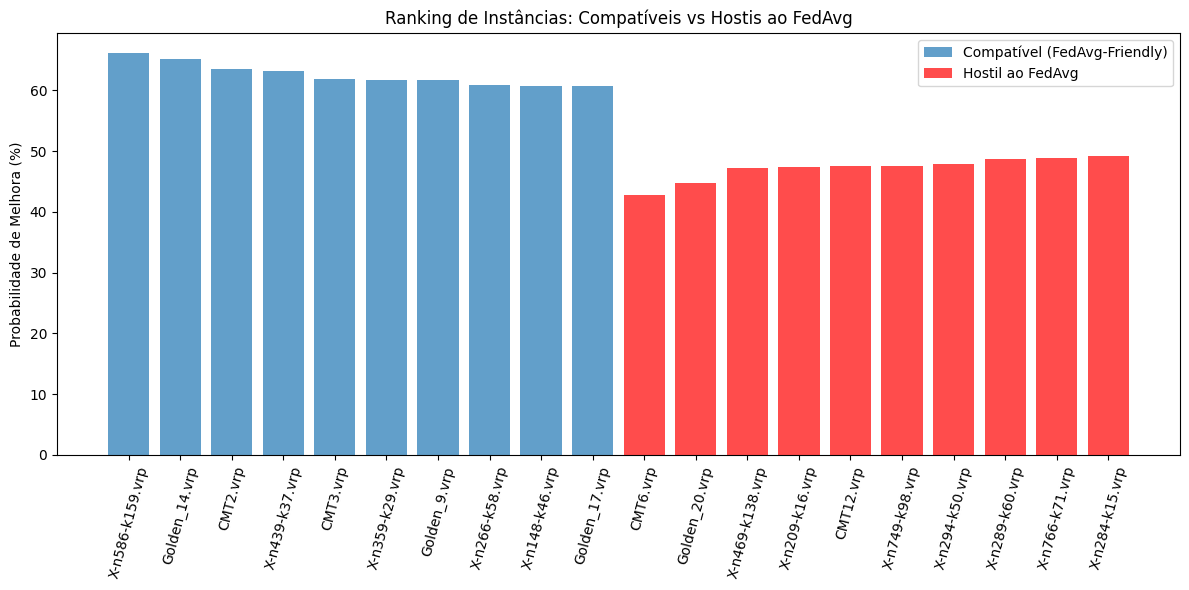

In [47]:
import matplotlib.pyplot as plt

# Selecionar top 10 compatíveis e top 10 hostis
top_compat = compatíveis.sort_values("Prob_Melhora", ascending=False).head(10)
top_hostis = hostis.sort_values("Prob_Melhora", ascending=True).head(10)

plt.figure(figsize=(12, 6))

# Plot compatíveis
plt.bar(top_compat["Instance_Basename"], top_compat["Prob_Melhora"], label="Compatível (FedAvg-Friendly)", alpha=0.7)

# Plot hostis
plt.bar(top_hostis["Instance_Basename"], top_hostis["Prob_Melhora"], label="Hostil ao FedAvg", alpha=0.7, color="red")

plt.xticks(rotation=75)
plt.ylabel("Probabilidade de Melhora (%)")
plt.title("Ranking de Instâncias: Compatíveis vs Hostis ao FedAvg")
plt.legend()
plt.tight_layout()
plt.show()


A análise das instâncias com maior e menor probabilidade de melhora sob a agregação FedAvg evidencia um comportamento assimétrico do algoritmo em função das características das instâncias do CVRP. Observa-se que instâncias como X-n586-k159.vrp, Golden_14.vrp e CMT2.vrp exibem consistência de desempenho, com taxas de melhoria superiores a 63% e variação de piora extremamente reduzida, indicando aderência estrutural ao processo de federação.

Por outro lado, instâncias como CMT6.vrp, Golden_20.vrp e X-n469-k138.vrp aparecem sistematicamente associadas a degradações superiores a 10%, mesmo em episódios onde outras instâncias apresentam ganhos significativos. Isso sugere a existência de instâncias hostis ao FedAvg, que introduzem ruído no processo global de agregação e podem reduzir o benefício coletivo. Esse efeito reforça a hipótese de que a federação não impacta todos os clientes de forma homogênea e que a seleção dos conjuntos locais pode introduzir viés no comportamento do modelo global.

Assim, do ponto de vista metodológico, os resultados indicam que o desempenho do FedAvg poderia ser melhorado com mecanismos de ponderação adaptativa de instâncias ou clientes, evitando que contribuições sistematicamente prejudiciais tenham o mesmo peso de instâncias compatíveis. Esse achado abre caminho para uma formulação de FedAvg sensível ao perfil das instâncias, o que se alinha com perspectivas recentes de federação personalizada e fairness em aprendizado distribuído.

Isso indica que FedAvg, na forma clássica, não garante benefícios equitativos entre os participantes e pode induzir distorções de desempenho local, penalizando algumas empresas em favor de outras.

In [26]:
import pandas as pd
import numpy as np
import re

path = "results_instances.xlsx"

# Garantir chave limpa
if "Scenario_Clean" not in df_instances.columns:
    df_instances = df_instances.copy()
    df_instances["Scenario_Clean"] = df_instances["Scenario"].str.replace(r"E\d+", "", regex=True)

# Função adaptada: detecta automaticamente o sufixo das colunas de agregação
def build_long_for_sheet(xlsx_path, sheet_name, df_instances_):
    df_sheet = pd.read_excel(xlsx_path, sheet_name=sheet_name)

    # Identificar o sufixo correto de agregação (avg, trimmed, majority, median)
    if "TrimmedMean" in sheet_name:
        sufixo = "trimmed"
    elif "MajorityVote" in sheet_name:
        sufixo = "majority"
    elif "Median" in sheet_name:
        sufixo = "median"
    else:
        sufixo = "avg"  # FedAvg padrão

    episodios = sorted({c.split("_")[0] for c in df_sheet.columns if "_local" in c})

    records = []
    for _, row in df_sheet.iterrows():
        scenario = row["Scenario"]
        for ep in episodios:
            local_col = f"{ep}_local"
            agg_col = f"{ep}_{sufixo}"

            if pd.notna(row.get(local_col)) and pd.notna(row.get(agg_col)):
                local = row[local_col]
                agg_val = row[agg_col]
                delta_abs = agg_val - local
                delta_pct = ((agg_val - local) / local) * 100 if local != 0 else np.nan
                status = "Melhorou" if agg_val < local else ("Piorou" if agg_val > local else "Igual")

                records.append({
                    "Scenario": scenario, "Episodio": ep,
                    "Local": local, "Agregado": agg_val,
                    "Delta_Absoluto": delta_abs, "Delta_Percentual": delta_pct,
                    "Status": status
                })

    df_long = pd.DataFrame(records)

    # Merge com instâncias
    df_long_merged = df_long.merge(
        df_instances_[["Scenario_Clean", "Instance_Basename"]],
        left_on="Scenario", right_on="Scenario_Clean", how="left"
    )

    df_long_merged = df_long_merged[df_long_merged["Instance_Basename"].notna()].copy()
    df_long_merged["Metodo"] = sheet_name.replace("Ganho_Máximo_", "")
    return df_long_merged

# Processar todas as abas
abas = ["Ganho_Máximo_FedAvg", "Ganho_Máximo_TrimmedMean", "Ganho_Máximo_MajorityVote", "Ganho_Máximo_Median"]
df_all = pd.concat([build_long_for_sheet(path, aba, df_instances) for aba in abas], ignore_index=True)

print("✅ Pipeline multi-método construído com sucesso!")
print("Total de eventos analisados:", len(df_all))
df_all.head()


✅ Pipeline multi-método construído com sucesso!
Total de eventos analisados: 42828


,Scenario,Episodio,Local,Agregado,Delta_Absoluto,Delta_Percentual,Status,Scenario_Clean,Instance_Basename,Metodo
0,K3C10J1,E1,61196.5556,61200.1111,3.5555,0.00581,Piorou,K3C10J1,X-n336-k84.vrp,FedAvg
1,K3C10J1,E1,61196.5556,61200.1111,3.5555,0.00581,Piorou,K3C10J1,X-n233-k16.vrp,FedAvg
2,K3C10J1,E1,61196.5556,61200.1111,3.5555,0.00581,Piorou,K3C10J1,X-n524-k153.vrp,FedAvg
3,K3C10J1,E1,61196.5556,61200.1111,3.5555,0.00581,Piorou,K3C10J1,X-n837-k142.vrp,FedAvg
4,K3C10J1,E1,61196.5556,61200.1111,3.5555,0.00581,Piorou,K3C10J1,X-n979-k58.vrp,FedAvg


In [27]:
# Calcular resumo por método com base no df_all já fundido
summary_methods = (
    df_all.groupby("Metodo")
    .agg(
        Eventos_Total=("Status", "count"),
        Prob_Melhora_Média=("Status", lambda x: (df_all.loc[x.index, "Status"] == "Melhorou").mean() * 100),
        Risco_Médio=("Delta_Percentual", lambda x: df_all.loc[x.index, "Delta_Percentual"][df_all.loc[x.index, "Delta_Percentual"] > 0].mean()),
        Ganho_Médio=("Delta_Percentual", lambda x: df_all.loc[x.index, "Delta_Percentual"][df_all.loc[x.index, "Delta_Percentual"] < 0].mean()),
    )
    .reset_index()
)

print("=== RESUMO GLOBAL POR MÉTODO ===")
display(summary_methods)


=== RESUMO GLOBAL POR MÉTODO ===


,Metodo,Eventos_Total,Prob_Melhora_Média,Risco_Médio,Ganho_Médio
0,FedAvg,10707,55.346969,0.411106,-1.570545
1,MajorityVote,10707,38.834407,0.472213,-1.654310
2,Median,10707,43.728402,0.527688,-1.486851
3,TrimmedMean,10707,51.153451,0.326683,-1.477931


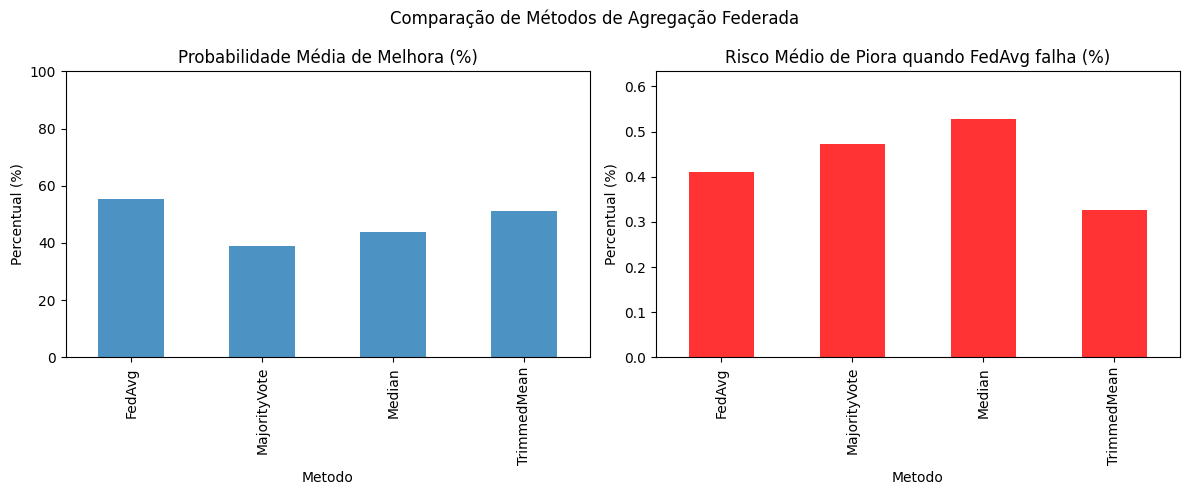

In [28]:
import matplotlib.pyplot as plt

# Dados base
df_plot = summary_methods.set_index("Metodo")

plt.figure(figsize=(12, 5))

# --- Gráfico 1: Probabilidade média de melhora ---
plt.subplot(1, 2, 1)
df_plot["Prob_Melhora_Média"].plot(kind="bar", alpha=0.8)
plt.title("Probabilidade Média de Melhora (%)")
plt.ylabel("Percentual (%)")
plt.ylim(0, 100)

# --- Gráfico 2: Risco médio de piora ---
plt.subplot(1, 2, 2)
df_plot["Risco_Médio"].plot(kind="bar", color="red", alpha=0.8)
plt.title("Risco Médio de Piora quando FedAvg falha (%)")
plt.ylabel("Percentual (%)")
plt.ylim(0, df_plot["Risco_Médio"].max() * 1.2)

plt.suptitle("Comparação de Métodos de Agregação Federada")
plt.tight_layout()
plt.show()


🔍 Exemplo intuitivo

Imagine duas instâncias:

Instância	Eventos de piora (%)	Piora média (%)	Interpretação
X-n586-k159.vrp	30%	+0.3%	💚 Mesmo quando falha, falha pouco — baixo risco
Golden_20.vrp	50%	+12%	🔴 Quando falha, destrói a solução — alto risco!

Risco Médio de Piora = média do Δ% positivo (piora) considerando apenas os casos onde o método falhou

🔹 Quanto MENOR esse número ⇒ mais seguro o método
🔹 Quanto MAIOR ⇒ o método é perigoso, pois pode deteriorar fortemente a solução

🧠 Resumo:
Método	Probabilidade de Melhora	Risco Médio de Piora	Perfil
FedAvg	55%	0.41%	Eficaz, mas com risco moderado
TrimmedMean	51%	0.32% (mais seguro)	Seguro e equilibrado → justo para federação ✅
Median	43%	0.52% (piora mais quando falha)	Oscilante e traiçoeiro ⚠️
MajorityVote	38%	0.47%	Falha muito com efeitos consideráveis ❌

In [29]:
# Top instâncias mais frequentes
print("\nTop 10 instâncias mais frequentes:")
print(df_instances["Instance_Basename"].value_counts().head(10))



Top 10 instâncias mais frequentes:
Instance_Basename
x                  135
X-n480-k70.vrp      22
Golden_1.vrp        20
X-n162-k11.vrp      20
X-n384-k52.vrp      19
X-n819-k171.vrp     19
X-n561-k42.vrp      19
X-n411-k19.vrp      19
X-n957-k87.vrp      18
CMT9.vrp            18
Name: count, dtype: int64


In [30]:
df_instances.query("Scenario == 'K3C10J1'").head()

,Scenario,Instance,Instance_Basename


In [31]:
# Ver todas as instâncias associadas ao cenário K3C10J2
df_instances.query("Scenario == 'K3C10J2'")


,Scenario,Instance,Instance_Basename


In [11]:
def parse_parts(fname: str):
    """Extrai ScenarioFull, Scenario(sem E) e Empresa a partir do nome do arquivo."""
    base = os.path.basename(fname)
    base_noext = re.sub(r"\.(csv|txt)$", "", base, flags=re.I)
    base_noext = re.sub(r"^irace[_-]?", "", base_noext, flags=re.I)

    # Esperado: K<k> E<e> C<..>J<..>
    m = re.search(r"(K\d+)E(\d+)(C\d+J\d+)", base_noext)
    if m:
        k, e, cj = m.groups()
        scenario_full = f"{k}E{e}{cj}"
        scenario = f"{k}{cj}"        # sem o E#
        empresa = f"E{e}"
    else:
        # fallback robusto
        scenario_full = base_noext
        empresa_m = re.search(r"E(\d+)", scenario_full)
        empresa = f"E{empresa_m.group(1)}" if empresa_m else None
        scenario = re.sub(r"E\d+", "", scenario_full)
    return scenario_full, scenario, empresa

files = sorted(glob.glob("*_instances.csv")) + sorted(glob.glob("*_instances.txt"))
print("Arquivos de instâncias encontrados:", len(files))

idx_rows = []
for f in files:
    sf, s, emp = parse_parts(f)
    idx_rows.append({"file": f, "ScenarioFull": sf, "Scenario": s, "Empresa": emp})
df_files = pd.DataFrame(idx_rows)
df_files.head()


Arquivos de instâncias encontrados: 270


,file,ScenarioFull,Scenario,Empresa
0,irace_K3E1C10J1_instances.csv,K3E1C10J1,K3C10J1,E1
1,irace_K3E1C10J2_instances.csv,K3E1C10J2,K3C10J2,E1
2,irace_K3E1C10J3_instances.csv,K3E1C10J3,K3C10J3,E1
3,irace_K3E1C15J1_instances.csv,K3E1C15J1,K3C15J1,E1
4,irace_K3E1C15J2_instances.csv,K3E1C15J2,K3C15J2,E1


In [12]:
def read_instances(file):
    # Lê flexível; separe automaticamente; 1a coluna
    try:
        tmp = pd.read_csv(file, header=None, engine="python", sep=None)
        col = tmp.iloc[:,0].astype(str)
    except Exception:
        # Fallback linha a linha
        with open(file, "r", encoding="utf-8", errors="ignore") as f:
            col = pd.Series([ln.rstrip("\n") for ln in f])

    # Limpeza
    col = (col
           .str.strip()
           .str.strip('"')
           .str.strip("'"))

    # Manter apenas linhas que parecem instância válida (.vrp ou .vrp.gz)
    valid = col.str.contains(r"\.vrp(\.gz)?$", case=False, na=False)
    return col[valid].tolist()

# Construir df_instances
recs = []
for row in idx_rows:
    insts = read_instances(row["file"])
    for inst in insts:
        recs.append({
            "Scenario": row["Scenario"],             # ex.: K3C10J2
            "ScenarioFull": row["ScenarioFull"],     # ex.: K3E1C10J2
            "Empresa": row["Empresa"],               # ex.: E1
            "Instance": inst,
            "Instance_Basename": os.path.basename(inst)
        })

df_instances = (pd.DataFrame(recs)
                .drop_duplicates(subset=["Scenario","Empresa","Instance_Basename"])
                .reset_index(drop=True))

print("Total de linhas no df_instances:", len(df_instances))
df_instances.head()


/tmp/ipykernel_37786/935429579.py:18: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  valid = col.str.contains(r"\.vrp(\.gz)?$", case=False, na=False)
/tmp/ipykernel_37786/935429579.py:18: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  valid = col.str.contains(r"\.vrp(\.gz)?$", case=False, na=False)
/tmp/ipykernel_37786/935429579.py:18: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  valid = col.str.contains(r"\.vrp(\.gz)?$", case=False, na=False)
/tmp/ipykernel_37786/935429579.py:18: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  valid = col.str.contains(r"\.vrp(\.gz)?$", case=False, na=False)
/tmp/ipykernel_37786/935429579.py:18: UserWarnin

Total de linhas no df_instances: 1935


/tmp/ipykernel_37786/935429579.py:18: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  valid = col.str.contains(r"\.vrp(\.gz)?$", case=False, na=False)
/tmp/ipykernel_37786/935429579.py:18: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  valid = col.str.contains(r"\.vrp(\.gz)?$", case=False, na=False)
/tmp/ipykernel_37786/935429579.py:18: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  valid = col.str.contains(r"\.vrp(\.gz)?$", case=False, na=False)
/tmp/ipykernel_37786/935429579.py:18: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  valid = col.str.contains(r"\.vrp(\.gz)?$", case=False, na=False)
/tmp/ipykernel_37786/935429579.py:18: UserWarnin

,Scenario,ScenarioFull,Empresa,Instance,Instance_Basename
0,K3C10J1,K3E1C10J1,E1,/home/administrador/giron/labotim/HGS-CVRP/Ins...,X-n275-k28.vrp
1,K3C10J1,K3E1C10J1,E1,/home/administrador/giron/labotim/HGS-CVRP/Ins...,X-n125-k30.vrp
2,K3C10J1,K3E1C10J1,E1,/home/administrador/giron/labotim/HGS-CVRP/Ins...,X-n783-k48.vrp
3,K3C10J1,K3E1C10J1,E1,/home/administrador/giron/labotim/HGS-CVRP/Ins...,X-n384-k52.vrp
4,K3C10J1,K3E1C10J1,E1,/home/administrador/giron/labotim/HGS-CVRP/Ins...,X-n344-k43.vrp


In [20]:
# Quantos cenários (sem E) e quantos ScenarioFull (com E)
print("Cenários (sem E):", df_instances["Scenario"].nunique())
print("Cenários (com E):", df_instances["ScenarioFull"].nunique())

# Para o cenário K3C10J2, ver quantas empresas têm listas:
print("\nEmpresas presentes em K3C10J2:")
print(df_instances.query("Scenario == 'K3C10J2'")["Empresa"].value_counts())

# Contagem de instâncias por empresa dentro de K3C10J2
print("\nInstâncias por empresa em K3C10J2:")
print(df_instances.query("Scenario == 'K3C10J2'")
        .groupby("Empresa")["Instance_Basename"].nunique())


Cenários (sem E): 27
Cenários (com E): 135

Empresas presentes em K3C10J2:
Empresa
E1    10
E2    10
E3    10
Name: count, dtype: int64

Instâncias por empresa em K3C10J2:
Empresa
E1    10
E2    10
E3    10
Name: Instance_Basename, dtype: int64


In [21]:
# Filtrar o conjunto correto: cenário (sem E) + empresa E1
subset_E1 = df_instances.query("Scenario == 'K3C10J2' and Empresa == 'E1'")\
                        .sort_values("Instance_Basename")

print("Qtde (deve bater com o arquivo E1):", len(subset_E1))
subset_E1[["ScenarioFull","Empresa","Instance_Basename"]]


Qtde (deve bater com o arquivo E1): 10


,ScenarioFull,Empresa,Instance_Basename
12,K3E1C10J2,E1,Golden_1.vrp
18,K3E1C10J2,E1,Golden_8.vrp
15,K3E1C10J2,E1,X-n139-k10.vrp
10,K3E1C10J2,E1,X-n162-k11.vrp
11,K3E1C10J2,E1,X-n351-k40.vrp
14,K3E1C10J2,E1,X-n359-k29.vrp
19,K3E1C10J2,E1,X-n367-k17.vrp
17,K3E1C10J2,E1,X-n766-k71.vrp
13,K3E1C10J2,E1,X-n916-k207.vrp
16,K3E1C10J2,E1,X-n957-k87.vrp


In [22]:
df_files[df_files["Scenario"] == "K3C10J2"].sort_values("Empresa")


,file,ScenarioFull,Scenario,Empresa
1,irace_K3E1C10J2_instances.csv,K3E1C10J2,K3C10J2,E1
136,irace_K3E1C10J2_scenario_instances.txt,K3E1C10J2,K3C10J2,E1
10,irace_K3E2C10J2_instances.csv,K3E2C10J2,K3C10J2,E2
145,irace_K3E2C10J2_scenario_instances.txt,K3E2C10J2,K3C10J2,E2
19,irace_K3E3C10J2_instances.csv,K3E3C10J2,K3C10J2,E3
154,irace_K3E3C10J2_scenario_instances.txt,K3E3C10J2,K3C10J2,E3


#Visão Geral

In [23]:
print("📊 Cenários distintos (sem E):", df_instances["Scenario"].nunique())
print("📊 Cenários+Empresa distintos (ScenarioFull):", df_instances["ScenarioFull"].nunique())
print("📊 Empresas distintas:", df_instances["Empresa"].nunique())

print("\nDistribuição de nº de instâncias por (ScenarioFull):")
display(df_instances.groupby("ScenarioFull")["Instance_Basename"].nunique().describe())


📊 Cenários distintos (sem E): 27
📊 Cenários+Empresa distintos (ScenarioFull): 135
📊 Empresas distintas: 7

Distribuição de nº de instâncias por (ScenarioFull):


count    135.000000
mean      14.333333
std        3.312122
min       10.000000
25%       10.000000
50%       15.000000
75%       18.000000
max       18.000000
Name: Instance_Basename, dtype: float64

In [24]:
inst_por_empresa = df_instances.groupby("Empresa")["Instance_Basename"].nunique()
print("Número de instâncias distintas por empresa:")
display(inst_por_empresa)

cenarios_por_empresa = df_instances.groupby("Empresa")["ScenarioFull"].nunique()
print("\nNúmero de cenários distintos por empresa:")
display(cenarios_por_empresa)


Número de instâncias distintas por empresa:


Empresa
E1    125
E2    130
E3    131
E4    120
E5    116
E6     87
E7     87
Name: Instance_Basename, dtype: int64


Número de cenários distintos por empresa:


Empresa
E1    27
E2    27
E3    27
E4    18
E5    18
E6     9
E7     9
Name: ScenarioFull, dtype: int64

In [25]:
print("Top 15 instâncias mais frequentes (todas as empresas):")
display(df_instances["Instance_Basename"].value_counts().head(15))

print("\nTop 10 instâncias por empresa:")
for emp, subdf in df_instances.groupby("Empresa"):
    print(f"\n--- {emp} ---")
    display(subdf["Instance_Basename"].value_counts().head(10))


Top 15 instâncias mais frequentes (todas as empresas):


Instance_Basename
X-n480-k70.vrp     22
Golden_1.vrp       20
X-n162-k11.vrp     20
X-n384-k52.vrp     19
X-n411-k19.vrp     19
X-n561-k42.vrp     19
X-n819-k171.vrp    19
Golden_8.vrp       18
X-n181-k23.vrp     18
X-n701-k44.vrp     18
X-n957-k87.vrp     18
CMT9.vrp           18
X-n129-k18.vrp     18
X-n449-k29.vrp     17
X-n120-k6.vrp      17
Name: count, dtype: int64


Top 10 instâncias por empresa:

--- E1 ---


Instance_Basename
Golden_5.vrp       8
X-n275-k28.vrp     7
Golden_9.vrp       7
X-n524-k153.vrp    7
Golden_8.vrp       7
X-n280-k17.vrp     7
X-n819-k171.vrp    6
X-n336-k84.vrp     6
Golden_14.vrp      6
X-n766-k71.vrp     6
Name: count, dtype: int64


--- E2 ---


Instance_Basename
X-n627-k43.vrp    9
X-n536-k96.vrp    6
X-n162-k11.vrp    6
X-n176-k26.vrp    6
CMT9.vrp          6
X-n599-k92.vrp    6
Golden_2.vrp      6
Golden_18.vrp     6
X-n237-k14.vrp    6
X-n502-k39.vrp    6
Name: count, dtype: int64


--- E3 ---


Instance_Basename
X-n214-k11.vrp     8
X-n143-k7.vrp      7
X-n561-k42.vrp     7
X-n344-k43.vrp     6
X-n979-k58.vrp     6
X-n957-k87.vrp     6
X-n1001-k43.vrp    6
CMT9.vrp           5
X-n376-k94.vrp     5
Golden_10.vrp      5
Name: count, dtype: int64


--- E4 ---


Instance_Basename
Golden_4.vrp       7
X-n106-k14.vrp     6
X-n384-k52.vrp     5
Golden_15.vrp      5
X-n670-k130.vrp    5
X-n172-k51.vrp     5
Golden_1.vrp       5
Golden_6.vrp       4
X-n655-k131.vrp    4
X-n876-k59.vrp     4
Name: count, dtype: int64


--- E5 ---


Instance_Basename
CMT4.vrp           7
X-n749-k98.vrp     6
Golden_16.vrp      6
Golden_3.vrp       5
X-n256-k16.vrp     5
X-n247-k50.vrp     5
X-n480-k70.vrp     4
X-n384-k52.vrp     4
X-n469-k138.vrp    4
X-n1001-k43.vrp    4
Name: count, dtype: int64


--- E6 ---


Instance_Basename
Golden_20.vrp      4
X-n157-k13.vrp     4
X-n655-k131.vrp    3
X-n219-k73.vrp     3
CMT12.vrp          3
X-n167-k10.vrp     3
X-n181-k23.vrp     3
X-n957-k87.vrp     3
Golden_19.vrp      2
CMT11.vrp          2
Name: count, dtype: int64


--- E7 ---


Instance_Basename
Golden_7.vrp       3
CMT14.vrp          3
X-n586-k159.vrp    3
X-n459-k26.vrp     3
X-n162-k11.vrp     3
X-n376-k94.vrp     3
X-n308-k13.vrp     2
X-n317-k53.vrp     2
CMT7.vrp           2
Golden_11.vrp      2
Name: count, dtype: int64

In [27]:
# Quantas empresas usam cada instância
inst_empresas = df_instances.groupby("Instance_Basename")["Empresa"].nunique()

print("Instâncias usadas por apenas 1 empresa:", (inst_empresas == 1).sum())
print("Instâncias usadas por >=2 empresas:", (inst_empresas >= 2).sum())

# exemplos
print("\nExemplo de instâncias exclusivas (só 1 empresa):")
display(inst_empresas[inst_empresas == 1].head(10))

print("\nExemplo de instâncias compartilhadas (>=2 empresas):")
display(inst_empresas[inst_empresas >= 2].head(10))


Instâncias usadas por apenas 1 empresa: 0
Instâncias usadas por >=2 empresas: 134

Exemplo de instâncias exclusivas (só 1 empresa):


Series([], Name: Empresa, dtype: int64)


Exemplo de instâncias compartilhadas (>=2 empresas):


Instance_Basename
CMT1.vrp     6
CMT10.vrp    6
CMT11.vrp    7
CMT12.vrp    7
CMT13.vrp    6
CMT14.vrp    6
CMT2.vrp     7
CMT3.vrp     7
CMT4.vrp     5
CMT5.vrp     6
Name: Empresa, dtype: int64

/tmp/ipykernel_6881/103769563.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=inst_por_empresa.index, y=inst_por_empresa.values, palette="Set2")


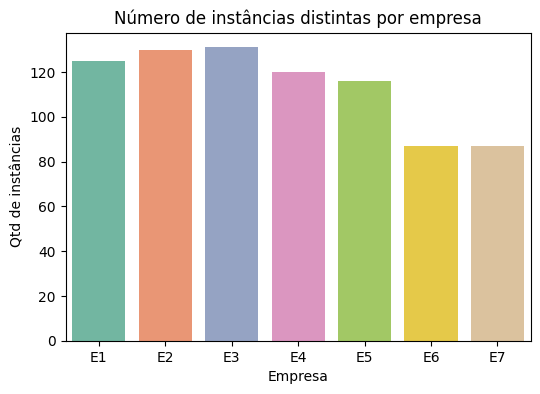

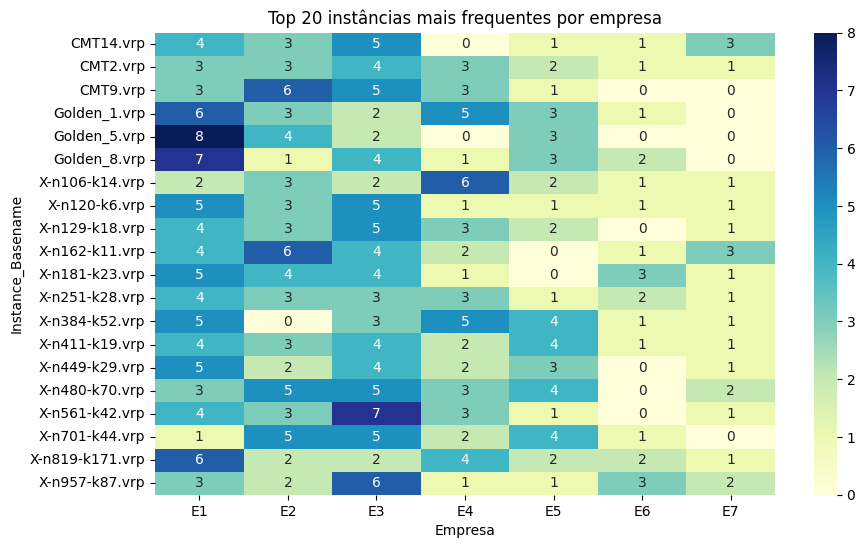

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Número de instâncias por empresa
plt.figure(figsize=(6,4))
sns.barplot(x=inst_por_empresa.index, y=inst_por_empresa.values, palette="Set2")
plt.title("Número de instâncias distintas por empresa")
plt.ylabel("Qtd de instâncias")
plt.show()

# Heatmap: instâncias mais frequentes × empresas
top20 = df_instances["Instance_Basename"].value_counts().head(20).index
heatmap_data = (df_instances[df_instances["Instance_Basename"].isin(top20)]
                .groupby(["Instance_Basename","Empresa"]).size()
                .unstack(fill_value=0))

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Top 20 instâncias mais frequentes por empresa")
plt.show()


In [30]:
df_res = pd.read_excel("results_instances.xlsx", sheet_name="Ganho_Máximo_Median")
df_res.head()

,Scenario,E1_local,E2_local,E3_local,E4_local,E5_local,E6_local,E7_local,E1_median,E2_median,E3_median,E4_median,E5_median,E6_median,E7_median
0,K3C10J1,61196.5556,28346.5000,74885.7500,NaN,NaN,NaN,NaN,61239.444444,28318.200000,74869.875000,NaN,NaN,NaN,NaN
1,K3C15J1,49928.4667,49987.5714,53904.2857,NaN,NaN,NaN,NaN,49928.466667,49987.571429,53904.285714,NaN,NaN,NaN,NaN
2,K3C18J1,32420.8125,44890.5000,73599.3889,NaN,NaN,NaN,NaN,32562.562500,44807.666667,73537.055556,NaN,NaN,NaN,NaN
3,K5C10J1,36891.7778,48257.6000,30026.9000,39292.7500,48913.4000,NaN,NaN,36792.666667,48275.500000,30005.100000,39227.375,49061.700000,NaN,NaN
4,K5C15J1,44699.2143,48073.6000,36407.0000,64245.8667,35221.6667,NaN,NaN,44724.357143,47991.000000,36407.000000,64251.000,27488.214286,NaN,NaN


In [32]:
# caminho do arquivo com resultados (pode ser .xlsx ou exportado .csv)
df_res = pd.read_excel("results_instances.xlsx", sheet_name="Ganho_Máximo_Median")


# identifica colunas de local e median
local_cols = [c for c in df_res.columns if c.endswith("_local")]
median_cols = [c for c in df_res.columns if c.endswith("_median")]

# derrete em formato longo
df_local = df_res.melt(id_vars=["Scenario"], value_vars=local_cols,
                       var_name="Empresa", value_name="Local")
df_local["Empresa"] = df_local["Empresa"].str.replace("_local","")

df_median = df_res.melt(id_vars=["Scenario"], value_vars=median_cols,
                        var_name="Empresa", value_name="Median")
df_median["Empresa"] = df_median["Empresa"].str.replace("_median","")

# junta
df_long = df_local.merge(df_median, on=["Scenario","Empresa"])
df_long["Delta"] = df_long["Median"] - df_long["Local"]
df_long["Melhora"] = df_long["Delta"] < 0
df_long["Piora"] = df_long["Delta"] > 0

df_long.head()


,Scenario,Empresa,Local,Median,Delta,Melhora,Piora
0,K3C10J1,E1,61196.5556,61239.444444,42.888844,False,True
1,K3C15J1,E1,49928.4667,49928.466667,-0.000033,True,False
2,K3C18J1,E1,32420.8125,32562.562500,141.750000,False,True
3,K5C10J1,E1,36891.7778,36792.666667,-99.111133,True,False
4,K5C15J1,E1,44699.2143,44724.357143,25.142843,False,True


In [33]:
import pandas as pd

# lê a aba "Ganho_Máximo_Median"
df_res = pd.read_excel("results_instances.xlsx", sheet_name="Ganho_Máximo_Median")

# separar colunas local e median
local_cols  = [c for c in df_res.columns if c.endswith("_local")]
median_cols = [c for c in df_res.columns if c.endswith("_median")]

# derrete Local
df_local = df_res.melt(id_vars=["Scenario"], value_vars=local_cols,
                       var_name="Empresa", value_name="Local")
df_local["Empresa"] = df_local["Empresa"].str.replace("_local","")

# derrete Median
df_median = df_res.melt(id_vars=["Scenario"], value_vars=median_cols,
                        var_name="Empresa", value_name="Median")
df_median["Empresa"] = df_median["Empresa"].str.replace("_median","")

# junta e calcula delta
df_long = df_local.merge(df_median, on=["Scenario","Empresa"])
df_long["Delta"]   = df_long["Median"] - df_long["Local"]
df_long["Melhora"] = df_long["Delta"] < 0
df_long["Piora"]   = df_long["Delta"] > 0

df_long.head()


,Scenario,Empresa,Local,Median,Delta,Melhora,Piora
0,K3C10J1,E1,61196.5556,61239.444444,42.888844,False,True
1,K3C15J1,E1,49928.4667,49928.466667,-0.000033,True,False
2,K3C18J1,E1,32420.8125,32562.562500,141.750000,False,True
3,K5C10J1,E1,36891.7778,36792.666667,-99.111133,True,False
4,K5C15J1,E1,44699.2143,44724.357143,25.142843,False,True


In [34]:
df_merged = df_long.merge(df_instances, on=["Scenario","Empresa"], how="left")
df_merged.head()


,Scenario,Empresa,Local,Median,Delta,Melhora,Piora,ScenarioFull,Instance,Instance_Basename
0,K3C10J1,E1,61196.5556,61239.444444,42.888844,False,True,K3E1C10J1,/home/administrador/giron/labotim/HGS-CVRP/Ins...,X-n275-k28.vrp
1,K3C10J1,E1,61196.5556,61239.444444,42.888844,False,True,K3E1C10J1,/home/administrador/giron/labotim/HGS-CVRP/Ins...,X-n125-k30.vrp
2,K3C10J1,E1,61196.5556,61239.444444,42.888844,False,True,K3E1C10J1,/home/administrador/giron/labotim/HGS-CVRP/Ins...,X-n783-k48.vrp
3,K3C10J1,E1,61196.5556,61239.444444,42.888844,False,True,K3E1C10J1,/home/administrador/giron/labotim/HGS-CVRP/Ins...,X-n384-k52.vrp
4,K3C10J1,E1,61196.5556,61239.444444,42.888844,False,True,K3E1C10J1,/home/administrador/giron/labotim/HGS-CVRP/Ins...,X-n344-k43.vrp


In [35]:
df_instances.head()
print(df_instances.shape)


(1935, 5)


In [36]:
df_merged = df_long.merge(df_instances, on=["Scenario","Empresa"], how="left")
print(df_merged.shape)
df_merged.head()


(1989, 10)


,Scenario,Empresa,Local,Median,Delta,Melhora,Piora,ScenarioFull,Instance,Instance_Basename
0,K3C10J1,E1,61196.5556,61239.444444,42.888844,False,True,K3E1C10J1,/home/administrador/giron/labotim/HGS-CVRP/Ins...,X-n275-k28.vrp
1,K3C10J1,E1,61196.5556,61239.444444,42.888844,False,True,K3E1C10J1,/home/administrador/giron/labotim/HGS-CVRP/Ins...,X-n125-k30.vrp
2,K3C10J1,E1,61196.5556,61239.444444,42.888844,False,True,K3E1C10J1,/home/administrador/giron/labotim/HGS-CVRP/Ins...,X-n783-k48.vrp
3,K3C10J1,E1,61196.5556,61239.444444,42.888844,False,True,K3E1C10J1,/home/administrador/giron/labotim/HGS-CVRP/Ins...,X-n384-k52.vrp
4,K3C10J1,E1,61196.5556,61239.444444,42.888844,False,True,K3E1C10J1,/home/administrador/giron/labotim/HGS-CVRP/Ins...,X-n344-k43.vrp


In [37]:
summary_inst = df_merged.groupby("Instance_Basename").agg(
    vezes=("Delta","count"),
    vezes_melhora=("Melhora","sum"),
    vezes_piora=("Piora","sum"),
    delta_medio=("Delta","mean")
).reset_index()

summary_inst["pct_melhora"] = summary_inst["vezes_melhora"] / summary_inst["vezes"]
summary_inst["pct_piora"]   = summary_inst["vezes_piora"] / summary_inst["vezes"]

# Top instâncias que mais pioram
summary_inst.sort_values("pct_piora", ascending=False).head(15)


,Instance_Basename,vezes,vezes_melhora,vezes_piora,delta_medio,pct_melhora,pct_piora
76,X-n294-k50.vrp,13,1,10,43.668338,0.076923,0.769231
119,X-n716-k35.vrp,16,5,11,28.354109,0.312500,0.687500
109,X-n573-k30.vrp,16,4,11,-301.792350,0.250000,0.687500
39,X-n120-k6.vrp,17,3,11,-276.656690,0.176471,0.647059
1,CMT10.vrp,16,4,10,28.009994,0.250000,0.625000
133,X-n979-k58.vrp,16,4,10,31.089245,0.250000,0.625000
122,X-n766-k71.vrp,16,3,10,14.930603,0.187500,0.625000
26,Golden_20.vrp,13,3,8,16.065315,0.230769,0.615385
132,X-n957-k87.vrp,18,6,11,-546.217722,0.333333,0.611111
120,X-n733-k159.vrp,10,4,6,3.258285,0.400000,0.600000


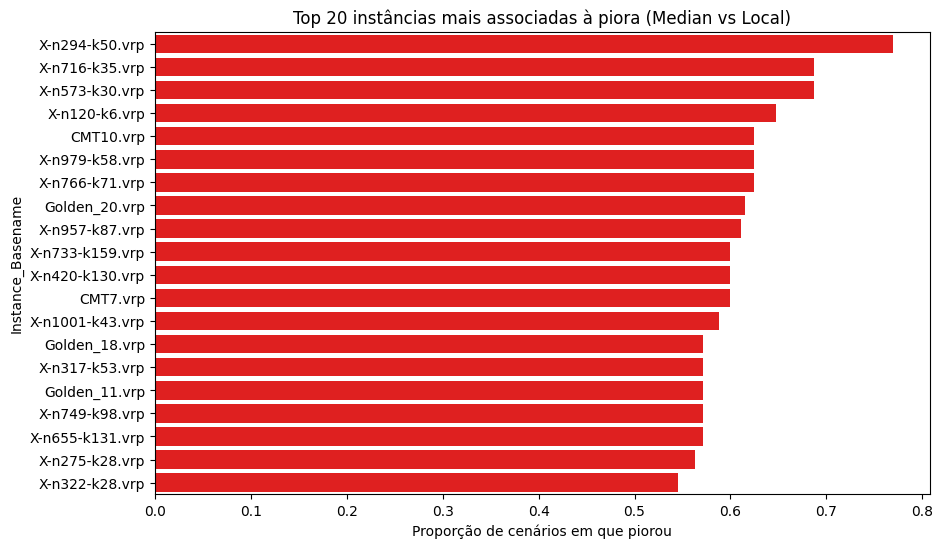

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

top20 = summary_inst.sort_values("pct_piora", ascending=False).head(20)

plt.figure(figsize=(10,6))
sns.barplot(data=top20, x="pct_piora", y="Instance_Basename", color="red")
plt.title("Top 20 instâncias mais associadas à piora (Median vs Local)")
plt.xlabel("Proporção de cenários em que piorou")
plt.show()


In [39]:
df_merged.query("Instance_Basename == 'X-n294-k50.vrp'")[["Scenario","Empresa","Local","Median","Delta","Melhora","Piora"]]


,Scenario,Empresa,Local,Median,Delta,Melhora,Piora
64,K5C15J1,E1,44699.214300,44724.357143,25.142843,False,True
91,K7C10J1,E1,52016.555600,52046.333333,29.777733,False,True
96,K7C15J1,E1,36725.333300,36819.800000,94.466700,False,True
206,K5C18J2,E1,33348.444444,33360.888889,12.444444,False,True
553,K3C18J2,E2,37136.666667,37136.666667,0.000000,False,False
668,K3C15J3,E2,41831.357143,41831.357143,0.000000,False,False
708,K5C15J3,E2,60672.866667,60859.000000,186.133333,False,True
1081,K5C10J3,E3,42653.400000,42727.100000,73.700000,False,True
1265,K5C15J2,E4,64794.214286,64871.214286,77.000000,False,True
1687,K7C18J3,E5,55559.277778,55576.555556,17.277778,False,True
